#AANSHUVI SHAH 60009220168 D1-1

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


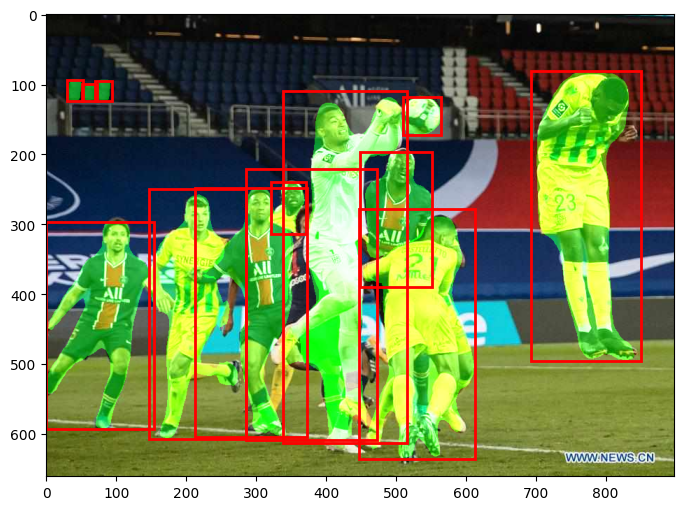

In [ ]:
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

model1 = maskrcnn_resnet50_fpn(pretrained=True)
model1.eval()

def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0)

def predict(image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        predictions = model1(image)
    return predictions

def show_predictions(image_path, predictions, threshold=0.75):
    image = np.array(Image.open(image_path).convert("RGB"))
    fig, ax = plt.subplots(1, figsize=(10, 6))
    ax.imshow(image)

    for box, mask, score in zip(predictions[0]['boxes'], predictions[0]['masks'], predictions[0]['scores']):
        if score > threshold:
            x1, y1, x2, y2 = box.numpy()
            mask = mask.squeeze().numpy()
            mask = (mask > 0.5).astype(np.uint8) * 255

            color_mask = np.zeros_like(image, dtype=np.uint8)
            color_mask[:, :, 1] = mask
            image = cv2.addWeighted(image, 1.0, color_mask, 0.5, 0)

            ax.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='red', linewidth=2))

    ax.imshow(image)
    plt.show()

image_path = '/content/football.jpg'
predictions = predict(image_path)
show_predictions(image_path, predictions)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


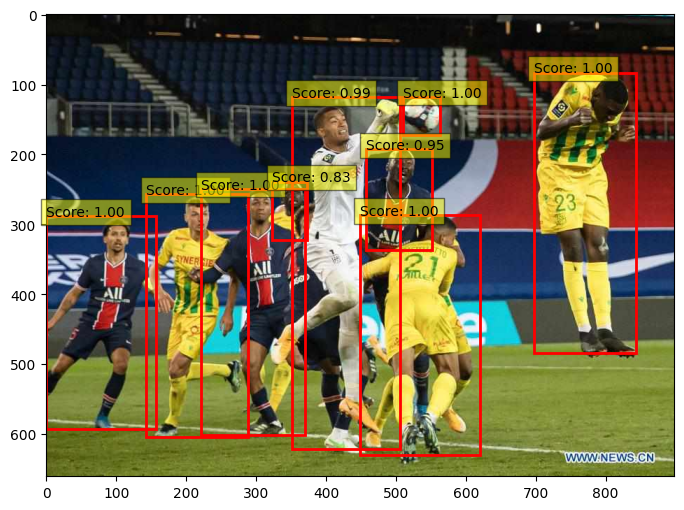

In [ ]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load pre-trained Faster R-CNN model
model2 = fasterrcnn_resnet50_fpn(pretrained=True)
model2.eval()

# Load and preprocess an image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0)

# Perform inference
def predict(image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        predictions = model2(image)
    return predictions

# Visualize results with bounding boxes
def show_predictions(image_path, predictions, threshold=0.75):
    image = np.array(Image.open(image_path).convert("RGB"))
    fig, ax = plt.subplots(1, figsize=(10, 6))
    ax.imshow(image)

    for box, score in zip(predictions[0]['boxes'], predictions[0]['scores']):
        if score > threshold:
            x1, y1, x2, y2 = box.numpy()
            ax.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='red', linewidth=2))
            ax.text(x1, y1, f"Score: {score:.2f}", bbox=dict(facecolor='yellow', alpha=0.5))

    plt.show()

# Example usage
image_path = "/content/football.jpg"
predictions = predict(image_path)
show_predictions(image_path, predictions)


In [ ]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn, maskrcnn_resnet50_fpn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

def calculate_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = box1_area + box2_area - intersection

    return intersection / union if union > 0 else 0

# Load pre-trained models
faster_rcnn = fasterrcnn_resnet50_fpn(pretrained=True).eval()
mask_rcnn = maskrcnn_resnet50_fpn(pretrained=True).eval()

def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0)

def predict(model, image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        predictions = model(image)
    return predictions

def compute_iou_for_models(image_path, ground_truth_box):
    faster_predictions = predict(faster_rcnn, image_path)
    mask_predictions = predict(mask_rcnn, image_path)

    faster_boxes = faster_predictions[0]['boxes'].numpy() if len(faster_predictions[0]['boxes']) > 0 else []
    mask_boxes = mask_predictions[0]['boxes'].numpy() if len(mask_predictions[0]['boxes']) > 0 else []

    iou_faster = max([calculate_iou(ground_truth_box, pred) for pred in faster_boxes] if len(faster_boxes) > 0 else [0])
    iou_mask = max([calculate_iou(ground_truth_box, pred) for pred in mask_boxes] if len(mask_boxes) > 0 else [0])

    return iou_faster, iou_mask

image_path = "/content/football.jpg"
ground_truth_box = [50, 50, 200, 200]
iou_faster, iou_mask = compute_iou_for_models(image_path, ground_truth_box)

print(f"IoU for Faster R-CNN: {iou_faster:.4f}")
print(f"IoU for Mask R-CNN: {iou_mask:.4f}")


IoU for Faster R-CNN: 0.3249
IoU for Mask R-CNN: 0.0875


#Without Non-Maximum Suppresion
IoU for Faster R-CNN: 0.3249 (32.49%)

This means that the best-matching bounding box predicted by Faster R-CNN overlaps 32.49% with the ground truth bounding box.
This suggests that Faster R-CNN is doing a moderate job in detecting the object but could be improved (higher IoU means better localization).
IoU for Mask R-CNN: 0.0875 (8.75%)

This means that the best-matching bounding box predicted by Mask R-CNN overlaps only 8.75% with the ground truth box.
This suggests that Mask R-CNN is struggling more with object localization in this case.

In [ ]:
import torchvision.ops as ops

def predict_with_nms(model, image_path, iou_threshold=0.3):
    image = preprocess_image(image_path)
    with torch.no_grad():
        predictions = model(image)

    # Apply Non-Maximum Suppression (NMS)
    keep = ops.nms(predictions[0]['boxes'], predictions[0]['scores'], iou_threshold)
    predictions[0]['boxes'] = predictions[0]['boxes'][keep]
    predictions[0]['scores'] = predictions[0]['scores'][keep]
    predictions[0]['masks'] = predictions[0]['masks'][keep] if 'masks' in predictions[0] else None

    return predictions

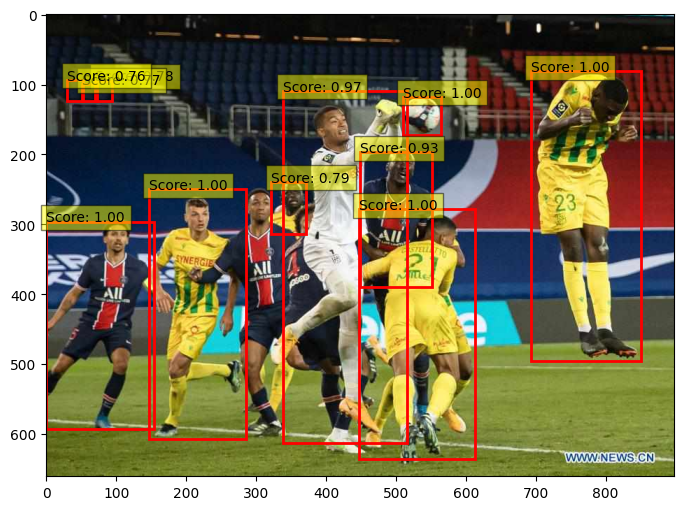

In [ ]:
image_path = '/content/football.jpg'
predictions = predict_with_nms(model1,image_path)
show_predictions(image_path, predictions)

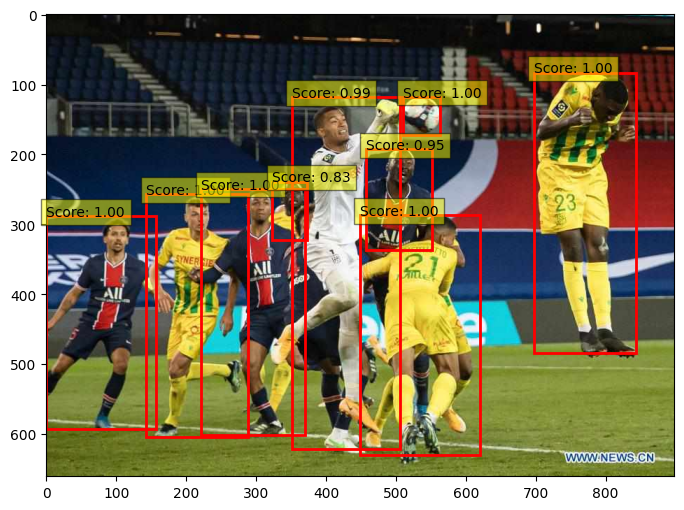

In [ ]:
image_path = '/content/football.jpg'
predictions = predict_with_nms(model2,image_path)
show_predictions(image_path, predictions)

In [ ]:
image_path = "/content/football.jpg"
ground_truth_box = [250, 250, 500, 500]
iou_faster, iou_mask = compute_iou_for_models(image_path, ground_truth_box)

print(f"IoU for Faster R-CNN: {iou_faster:.4f}")
print(f"IoU for Mask R-CNN: {iou_mask:.4f}")

IoU for Faster R-CNN: 0.4649
IoU for Mask R-CNN: 0.5327


#With Non-Maximum Suppresion
IoU for Faster R-CNN:  0.4649 (46.49%)

This means that the best-matching bounding box predicted by Faster R-CNN overlaps 46.49% with the ground truth bounding box.
This suggests that Faster R-CNN is doing a better job in detecting the object which improved (higher IoU means better localization) after Non-Maximum Suppresion

IoU for Mask R-CNN: 0.5327 (52.27%)

This means that the best-matching bounding box predicted by Mask R-CNN overlaps a significant 52.27% of the ground truth box.
This suggests that Mask R-CNN With Non-Maximum Suppresion has better perfromance with object localization in this case.